<center><h2>
<a href="https://rebrand.ly/github-of-masum">Kindly visit my portfolio to see more of my works</a>
</h2></center>

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
import scikitplot as skplot
from sklearn.model_selection import KFold
from dask import dataframe as dd
from sklearn.utils import shuffle

warnings.filterwarnings("ignore")

In [2]:
def readCSV_Function(file_path):
    dask_df = dd.read_csv(file_path, blocksize=1e6)
    dask_df = dask_df.repartition(npartitions=8)
    return dask_df.compute(scheduler='threads')

In [3]:
filePath = "D:\Thesis_Group_of_Brig_Gen_Razzak_Sir\After_Feature_Engineering\\new_balanced_data.csv"

df = readCSV_Function(filePath)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df = shuffle(df)
df.shape

(329626, 43)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

y = df['Label']
X = df.drop(columns='Label')

X_std = StandardScaler().fit_transform(X) # data standardized / scaled here
X_norm = preprocessing.normalize(X_std)

X_train, X_test, y_train, y_test = train_test_split(X, y ,
                                   random_state=1,
                                   test_size=0.2,
                                   shuffle=True)

<center><h4 style="background:yellow;color:black">
Logistic Regression
</center></h4>

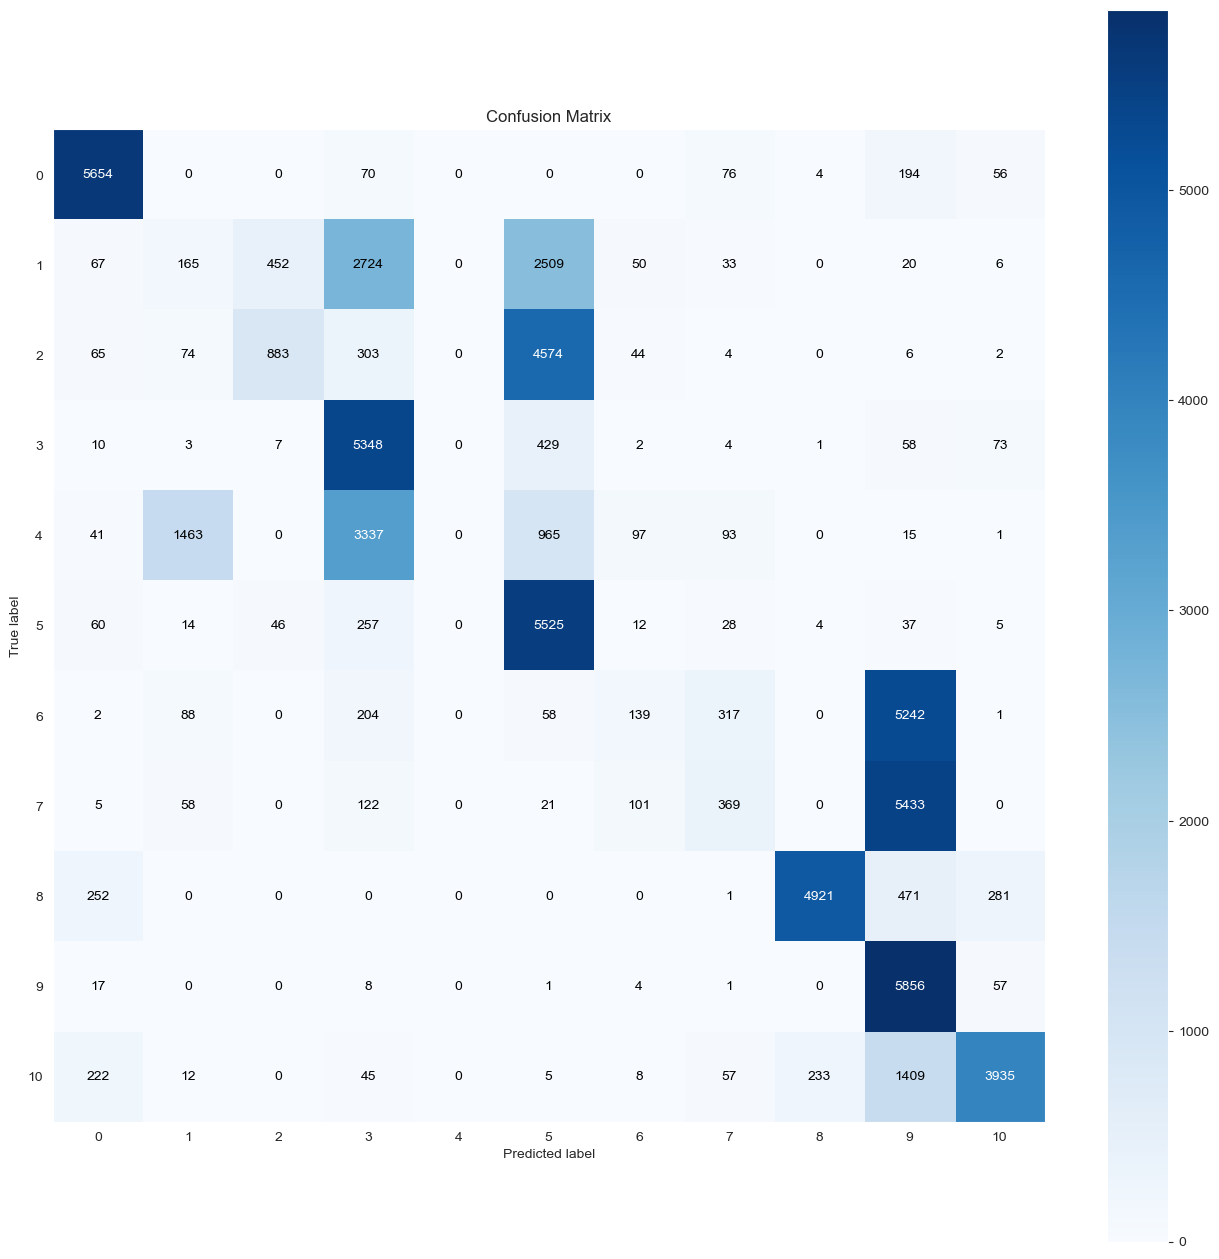

In [5]:
# fitting the model
model = LogisticRegression(max_iter=330000)
strategy = OneVsRestClassifier(model)
strategy.fit(X_train,y_train)
# making predictions
y_predict_LR = strategy.predict(X_test)

# classification report writing on file
txt_File_Path = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\Model_Info\\Over_Sampled_Data\\"
txt_File_Name = "Logistic_Regression.txt"

with open(txt_File_Path+txt_File_Name, 'w+') as file:
    file.writelines(classification_report(y_test,y_predict_LR))

skplot.metrics.plot_confusion_matrix(y_test,y_predict_LR,figsize=(16,16))

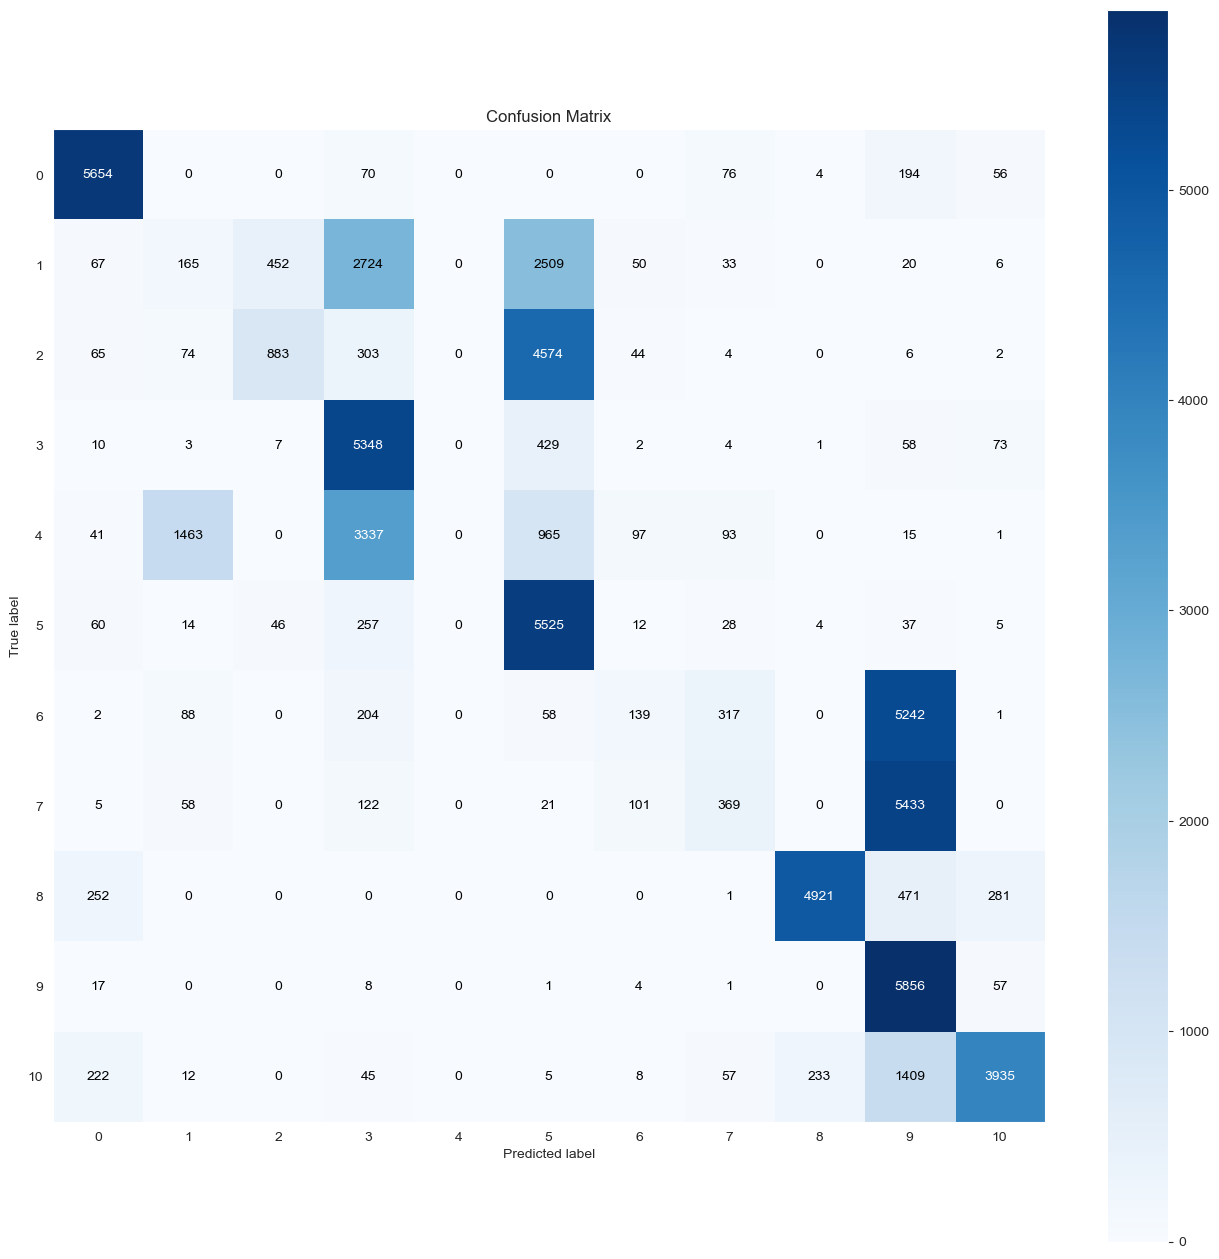

In [11]:
conf_img_Path = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\Model_Info\\Over_Sampled_Data\\"
conf_img_Name = "Logistic_Regression.png"
conf_matrix_LR = skplot.metrics.plot_confusion_matrix(y_test,y_predict_LR,figsize=(16,16))
conf_matrix_LR.plot(cmap=plt.cm.Greens)
conf_matrix_LR.figure.savefig(conf_img_Path+conf_img_Name,dpi=300)

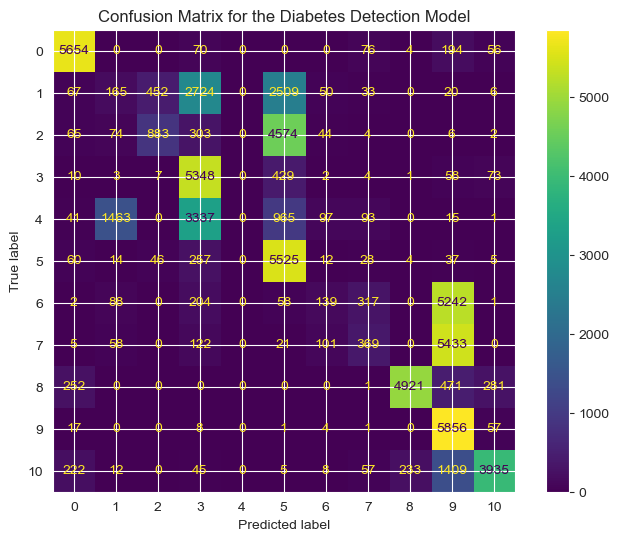

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


conf_matrix = confusion_matrix(y_test, y_predict_LR)
# true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()
# print(f"True Negative: {true_neg}\nFalse Positive: {false_pos}\n False Positive: {false_neg}\nTrue Positive: {true_pos}")
# print(f"Accuracy Score: {accuracy_score(y_test, y_predict_LR).round(2)}")

fig, ax = plt.subplots(figsize=(8,6), dpi=100)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=strategy.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

<center><h4 style="background:yellow;color:black">
Decision Tree
</center></h4>

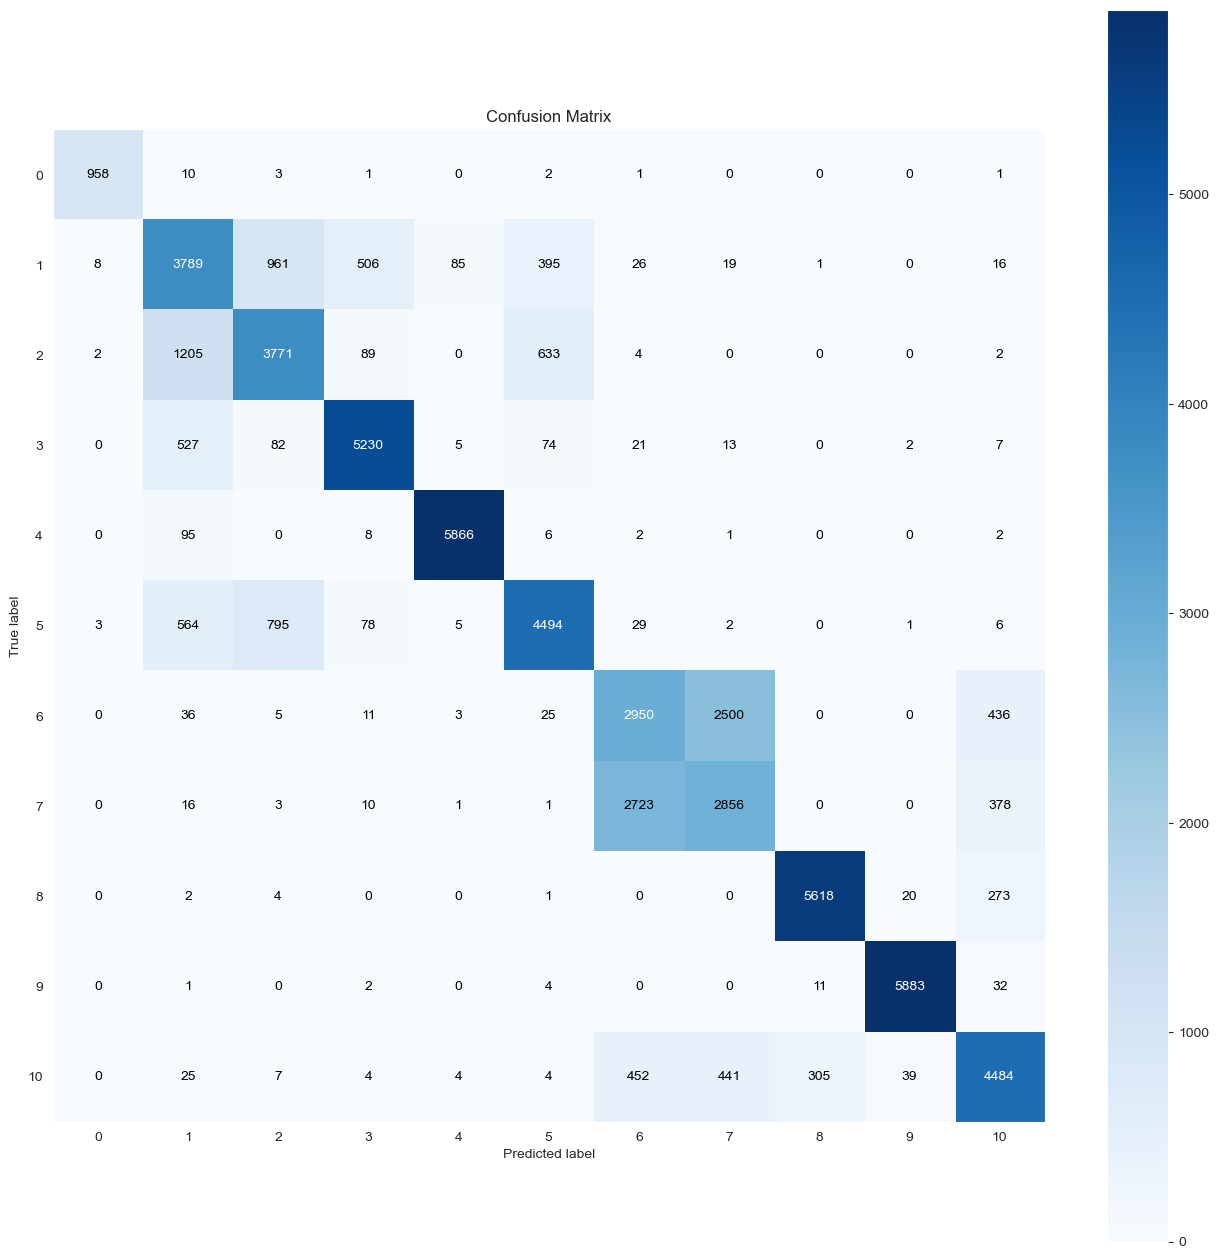

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train,y_train)
y_predict_dt = dt_classifier.predict(X_test)

# classification report writing on file
txt_File_Path = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\Model_Info\\Over_Sampled_Data\\"
txt_File_Name = "Decision_Tree.txt"

with open(txt_File_Path+txt_File_Name, 'w+') as file:
    file.writelines(classification_report(y_test,y_predict_dt))

skplot.metrics.plot_confusion_matrix(y_test,y_predict_dt,figsize=(16,16))

<center><h4 style="background:orange;color:black">
Plotting Decision Tree
</center></h4>

In [ ]:
cols = X.columns


<center><h4 style="background:yellow;color:black">
Random Forest
</center></h4>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=0,criterion='entropy',n_estimators=5000)
rf_classifier.fit(X_train,y_train)
y_predict_RF = rf_classifier.predict(X_test)

# classification report writing on file
txt_File_Path = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\Model_Info\\Over_Sampled_Data\\"
txt_File_Name = "Random_Forest.txt"

with open(txt_File_Path+txt_File_Name, 'w+') as file:
    file.writelines(classification_report(y_test,y_predict_RF))

skplot.metrics.plot_confusion_matrix(y_test,y_predict_RF,figsize=(16,16))

<center><h4 style="background:yellow;color:black">
K Nearest Neighbours
</center></h4>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn_classifier = KNeighborsClassifier(n_neighbors=3)
kn_classifier.fit(X_train,y_train)

y_predict_KN = kn_classifier.predict(X_test)

# classification report writing on file
txt_File_Path = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\Model_Info\\Over_Sampled_Data\\"
txt_File_Name = "K_Nearest_Neighbors.txt"

with open(txt_File_Path+txt_File_Name, 'w+') as file:
    file.writelines(classification_report(y_test,y_predict_KN))

skplot.metrics.plot_confusion_matrix(y_test,y_predict_KN,figsize=(16,16))

<center><h4 style="background:yellow;color:black">
Extra Tree Classifier
</center></h4>

##### need data normalization here

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y ,
                                                    random_state=1,
                                                    test_size=0.2,
                                                    shuffle=True)
scaler = StandardScaler()
scaler.fit(X_train)

X_train.scaler.transform(X_train)
y_train.scaler.transform(y_train)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier

extra_tree = ExtraTreeClassifier(random_state=0,criterion='gini')
ex_classifier = BaggingClassifier(extra_tree,random_state=0).fit(X_train,y_train)

y_predict_EX = ex_classifier.predict(X_test,y_test)

# classification report writing on file
txt_File_Path = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\Model_Info\\Over_Sampled_Data\\"
txt_File_Name = "Extra_Tree_Classifier.txt"

with open(txt_File_Path+txt_File_Name, 'w+') as file:
    file.writelines(classification_report(y_test,y_predict_EX))

skplot.metrics.plot_confusion_matrix(y_test,y_predict_EX,figsize=(16,16))